In [1]:
# System modules
import sys
import random
import time
import datetime 

# Data Analysis and Modeling modules
import sklearn
import pandas as pd

In [2]:
# Data Visualization modules
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.pylab as pylab
import matplotlib.ticker as ticker
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Visualization Configuration
# for jupyter notebook
%matplotlib inline 
style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [4]:
train_data_raw = pd.read_csv('./data/processed_train_data.csv')
test_data = pd.read_csv('./data/processed_test_data.csv')

FileNotFoundError: File b'./data/processed_train_data.csv' does not exist

In [3]:
# train_data_raw.head()
# Create a copy of the data to work on
train_data = train_data_raw.copy(deep=True)
data_cleaner = [train_data, test_data]

NameError: name 'train_data_raw' is not defined

In [7]:
train_data.head()

,Unnamed: 0,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,...,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Year,Day,Hour
0,0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,...,0,0,0,0,0,0,1,2015,13,23
1,1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,...,0,0,0,0,0,0,1,2015,13,23
2,2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,...,0,0,0,0,0,0,1,2015,13,23
3,3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,...,0,0,0,0,0,0,1,2015,13,23
4,4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,...,0,0,0,0,0,0,1,2015,13,23


In [11]:
crime_categories = train_data['Category'].unique()
print("Number of categries:", len(crime_categories))
print(crime_categories)

Number of categries: 39
['WARRANTS' 'OTHER OFFENSES' 'LARCENY/THEFT' 'VEHICLE THEFT' 'VANDALISM'
 'NON-CRIMINAL' 'ROBBERY' 'ASSAULT' 'WEAPON LAWS' 'BURGLARY'
 'SUSPICIOUS OCC' 'DRUNKENNESS' 'FORGERY/COUNTERFEITING' 'DRUG/NARCOTIC'
 'STOLEN PROPERTY' 'SECONDARY CODES' 'TRESPASS' 'MISSING PERSON' 'FRAUD'
 'KIDNAPPING' 'RUNAWAY' 'DRIVING UNDER THE INFLUENCE'
 'SEX OFFENSES FORCIBLE' 'PROSTITUTION' 'DISORDERLY CONDUCT' 'ARSON'
 'FAMILY OFFENSES' 'LIQUOR LAWS' 'BRIBERY' 'EMBEZZLEMENT' 'SUICIDE'
 'LOITERING' 'SEX OFFENSES NON FORCIBLE' 'EXTORTION' 'GAMBLING'
 'BAD CHECKS' 'TREA' 'RECOVERED VEHICLE' 'PORNOGRAPHY/OBSCENE MAT']


In [13]:
number_of_crimes = train_data['Category'].value_counts()
print(number_of_crimes)

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

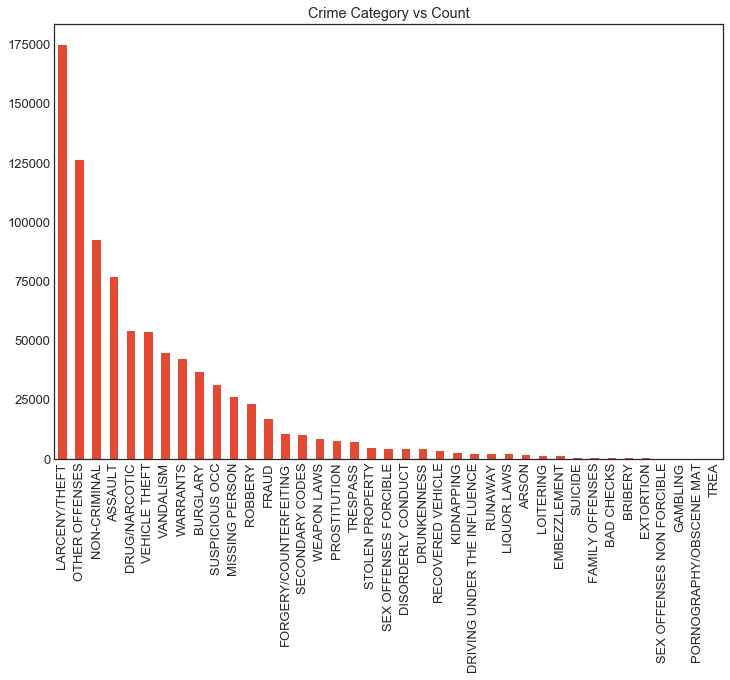

In [19]:
train_data['Category'].value_counts().plot.bar(
    fontsize=13, 
    title="Crime Category vs Count"
)

In [44]:
percent_of_crime = number_of_crimes / sum(number_of_crimes)
# print(percent_of_crime.cumsum())

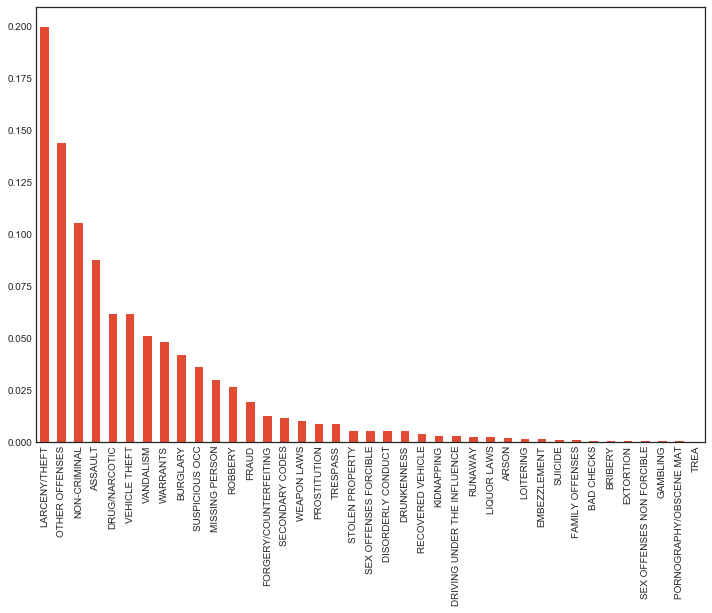

In [34]:
percent_of_crime.plot.bar()

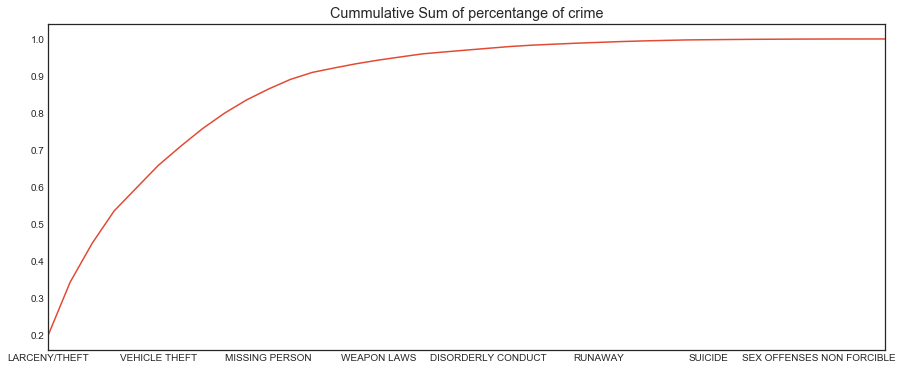

In [51]:
percent_of_crime.cumsum().plot.line(
    title="Cummulative Sum of percentange of crime",
    figsize=(15,6)
)

# Day of Week

In [57]:
day_of_week_count = train_data['DayOfWeek'].value_counts()
print(day_of_week_count)

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64


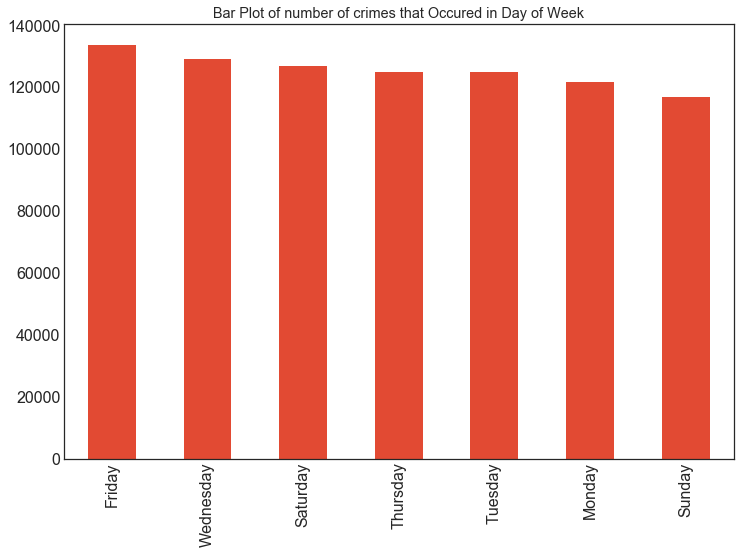

In [56]:
train_data['DayOfWeek'].value_counts().plot.bar(
    fontsize=12, 
    title="Bar Plot of number of crimes that Occured in Day of Week"
)

In [58]:
percent_day_of_week = day_of_week_count / sum(day_of_week_count)
print(percent_day_of_week)

Friday       0.152308
Wednesday    0.147157
Saturday     0.144422
Thursday     0.142404
Tuesday      0.142321
Monday       0.138471
Sunday       0.132916
Name: DayOfWeek, dtype: float64


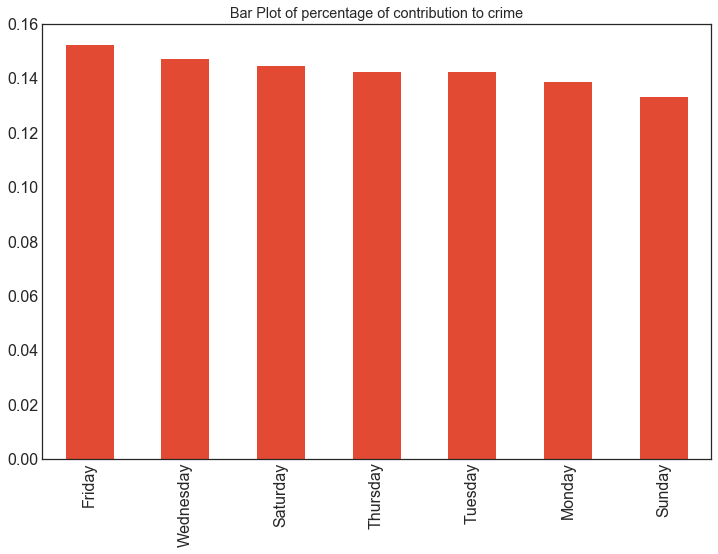

In [62]:
percent_day_of_week.plot.bar(
    title="Bar Plot of percentage of contribution to crime",
    fontsize=16    
)
# there isn't much volitility in the data thus may be useless

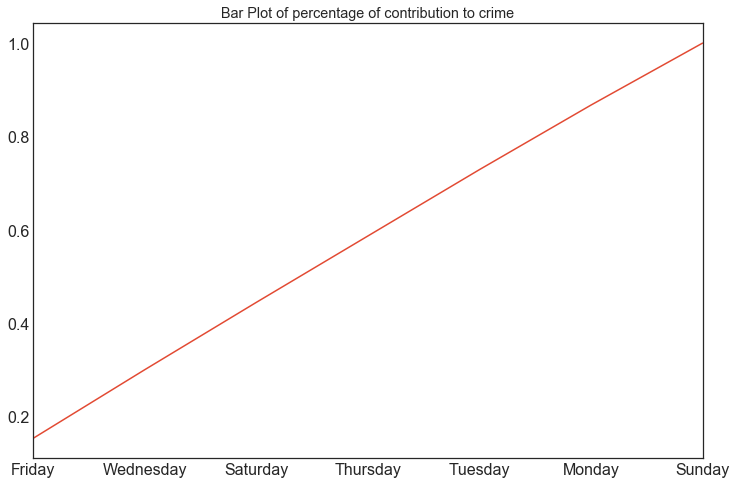

In [63]:
percent_day_of_week.cumsum().plot.line(
    title="Bar Plot of percentage of contribution to crime",
    fontsize=16    
)

# Date Column

In [69]:
crime_per_year = train_data['Year'].value_counts()

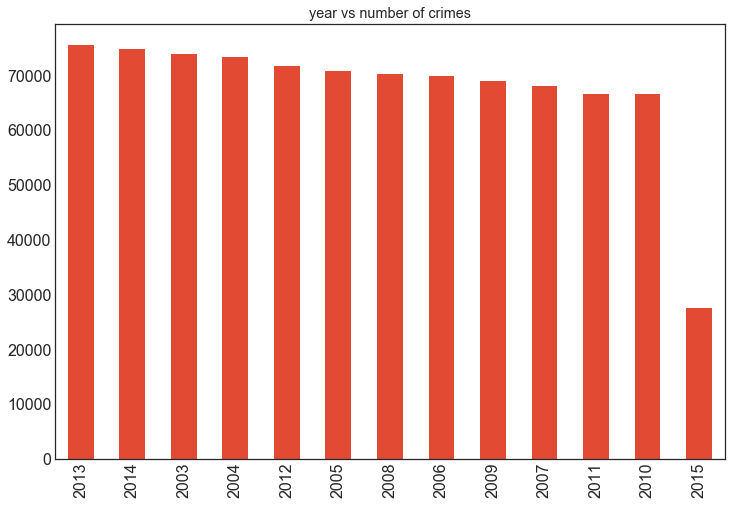

In [75]:
crime_per_year.plot.bar(
    title="year vs number of crimes",
    fontsize=16    
)
# not much crime was recorded in 2015 that is why it is such a low number
# don't mistake it for a trend. 
# percent of crime that occurs is relatively same with steady decrease

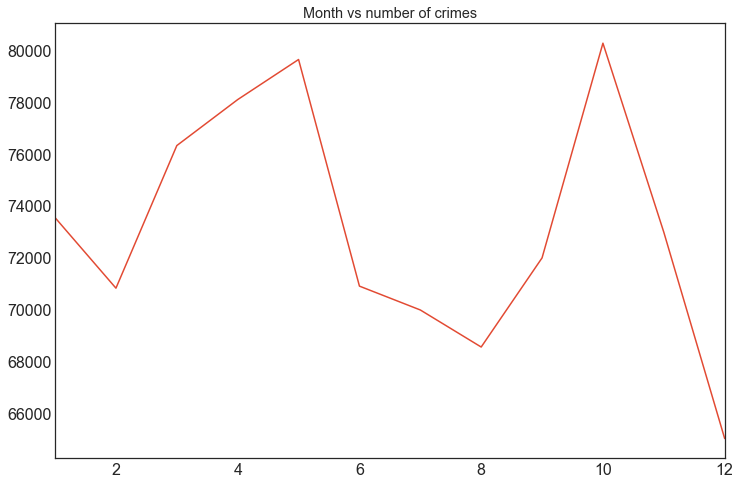

In [79]:
crime_per_month = train_data['Month'].value_counts().sort_index()
crime_per_month.plot.line(
    title="Month vs number of crimes",
    fontsize=16    
)

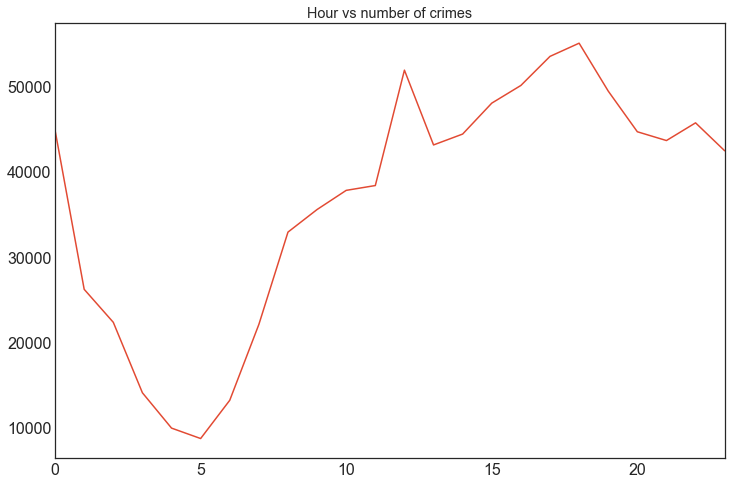

In [82]:
crime_per_hour = train_data['Hour'].value_counts().sort_index()
crime_per_hour.plot.line(
    title="Hour vs number of crimes",
    fontsize=16    
)

# PdDistrict

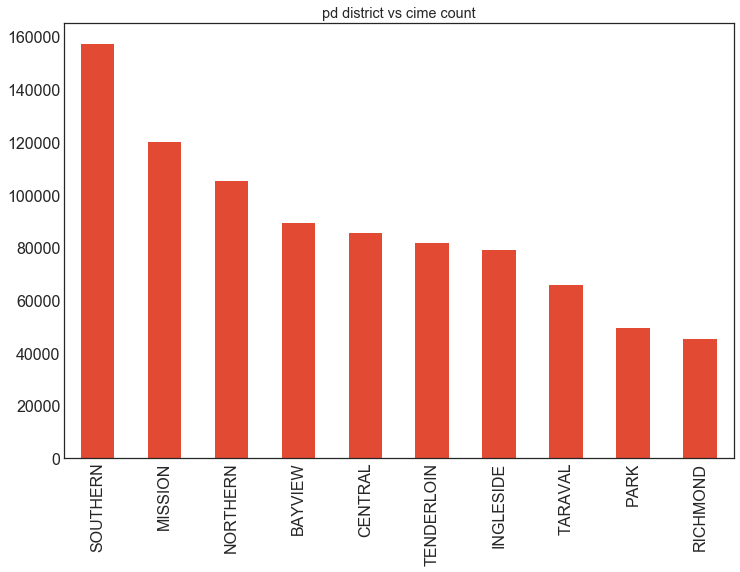

In [88]:
crimes_in_pddistrict = train_data['PdDistrict'].value_counts()
crimes_in_pddistrict.plot.bar(
    fontsize=16,
    title="pd district vs cime count"
)

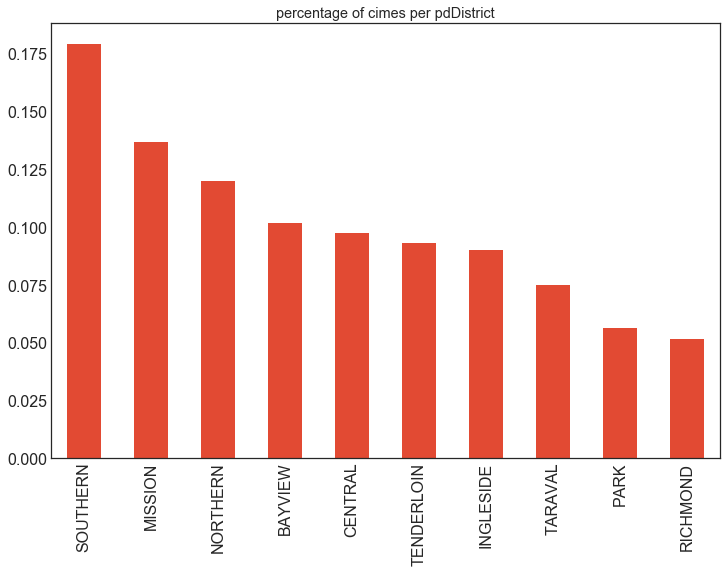

In [90]:
percent_of_crime_pddistrict = crimes_in_pddistrict / sum(crimes_in_pddistrict)
percent_of_crime_pddistrict.plot.bar(
    fontsize=16,
    title="percentage of cimes per pdDistrict"
)

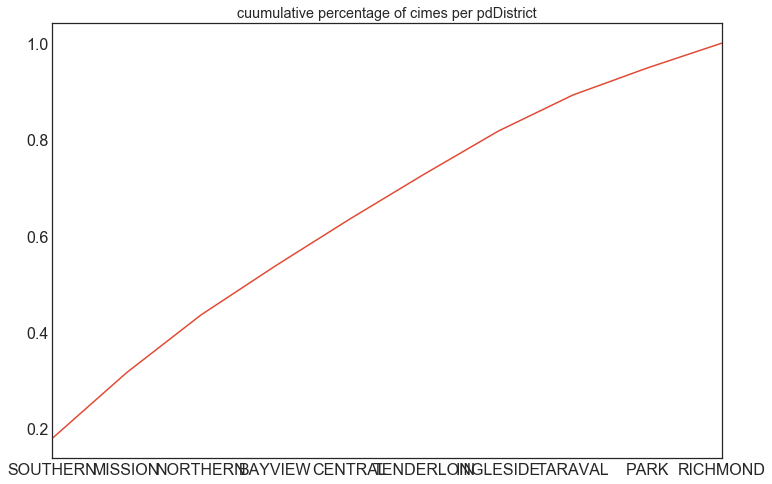

In [92]:
percent_of_crime_pddistrict.cumsum().plot.line(
    fontsize=16,
    title="cuumulative percentage of cimes per pdDistrict"
)

Text(0.5,1,'Number of Crimes per District')

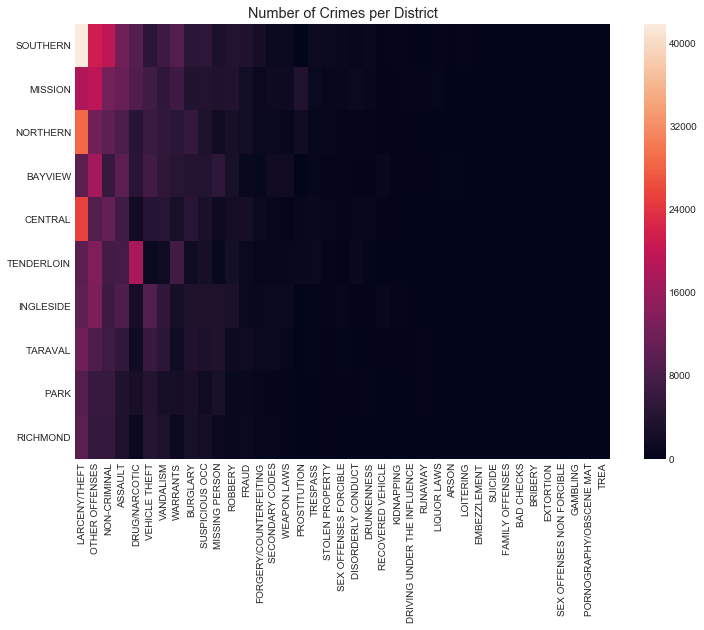

In [96]:
pt = pd.pivot_table(train_data,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[train_data.PdDistrict.value_counts().index,number_of_crimes.index]
ax = sns.heatmap(_)
ax.set_title("Number of Crimes per District")

Text(0.5,1,'Repartition of Crimes accross Districts')

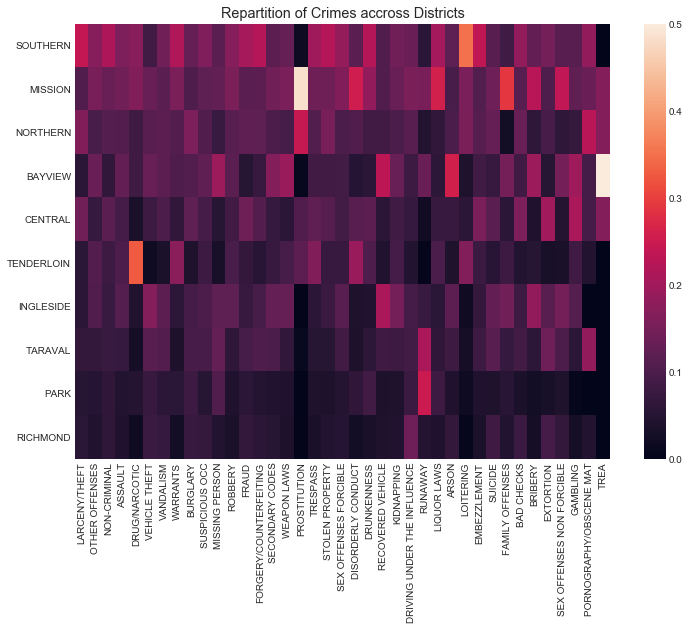

In [100]:
# the number of larceny theft is big 
#thus we need to look at the percentage of crime in each district
pt = pd.pivot_table(train_data,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
pt = pt/pt.sum(axis = 0)
_ = pt.loc[train_data['PdDistrict'].value_counts().index,number_of_crimes.index]
ax = sns.heatmap(_)
ax.set_title("Repartition of Crimes accross Districts")

# Crime based on X,Y

In [118]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Heatmap', y=1.05, size=15)

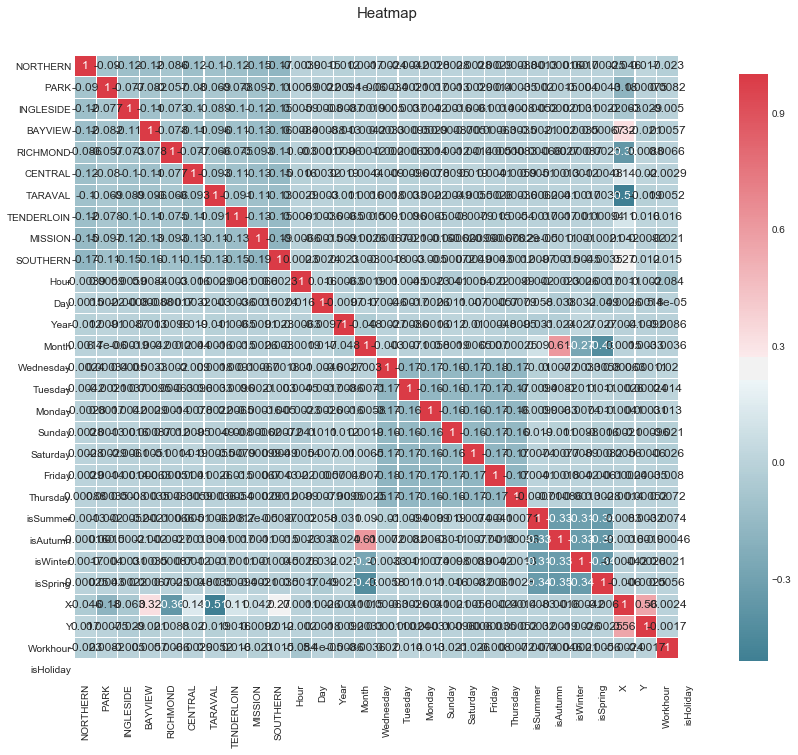

In [119]:
features = train_data['PdDistrict'].unique().tolist() + ['Hour', 'Day', 'Year', 'Month'] + \
train_data['DayOfWeek'].unique().tolist() + \
['isSummer', 'isAutumn', 'isWinter', 'isSpring', 'X', 'Y', 'Workhour', 'isHoliday']

correlation_heatmap(train_data[features])